## Imports

In [ ]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import model_selection
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import re
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

import time

## Loading + Pre-Processing

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Our target variable that we will be using multi-class classification on is `Sex`

In [ ]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No Missing Values

In [ ]:
# Let's vectorize M,F,I values in the column first.
d = {'M': 0,
     'F': 1,
     'I': 2}

df.Sex = df.Sex.map(d)

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#Labels
y = tf.keras.utils.to_categorical(df.Sex)

In [ ]:
X = df.drop(labels=['Sex'], axis=1)

In [ ]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


We need to normalize the data using because of the `Rings` column (it's integer and pretty high values compared to the remainder of the frame

In [ ]:
X=(X-X.mean())/X.std()

In [ ]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,1.571355
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,-0.909904
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,-0.289589
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,0.020568
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,-0.909904
...,...,...,...,...,...,...,...,...
4172,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053,0.330726
4173,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666,0.020568
4174,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895,-0.289589
4175,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690,0.020568


### Splitting the data

In [ ]:
#Split data from X, y into training, validation, and testing (approximately a 70, 20, 10 split, respectively).
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.90, random_state = 1)

#Now from this, we will split the X_train, y_train AGAIN to get X_train, y_train, x_val, y_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.75, random_state = 1)

print(f'Size of X_train: {len(X_train)}')
print(f'Size of y_train: {len(y_train)}')
print('---------------------------------')
print(f'Size of X_val: {len(X_val)}')
print(f'Size of y_val: {len(y_val)}')
print('---------------------------------')
print(f'Size of X_test: {len(X_test)}')
print(f'Size of y_test: {len(y_test)}')


Size of X_train: 2819
Size of y_train: 2819
---------------------------------
Size of X_val: 940
Size of y_val: 940
---------------------------------
Size of X_test: 418
Size of y_test: 418


## Model Development

In [ ]:
def model_():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(56, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(16, activation='relu'))

    model.add(layers.Dense(3,activation='softmax'))

    return model

In [ ]:
model = model_()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                504       
                                                                 
 dense_1 (Dense)             (None, 32)                1824      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,907
Trainable params: 2,907
Non-trainable params: 0
_________________________________________________________________


## Analyzing Loss Functions

We'll analyze loss functions first.

To analyze different loss functions, we'll keep the optimizer the same (i.e. Adam) however we'll try to tune the learning rate, epochs, and batch size to get the best model performance for a specific loss.

#### 1. Categorical Cross Entropy Loss

In [ ]:
# plotting function:
def generate_plots(history):
    #accuracies
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categoricla accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=1)

Epoch 1/100
89/89 [==============================] - 1s 5ms/step - loss: 0.8058 - categorical_accuracy: 0.5999 - val_loss: 0.8295 - val_categorical_accuracy: 0.5766
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 0.8071 - categorical_accuracy: 0.5938 - val_loss: 0.8233 - val_categorical_accuracy: 0.5798
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 0.8040 - categorical_accuracy: 0.5981 - val_loss: 0.8258 - val_categorical_accuracy: 0.5755
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.8022 - categorical_accuracy: 0.6091 - val_loss: 0.8276 - val_categorical_accuracy: 0.5766
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.8005 - categorical_accuracy: 0.6041 - val_loss: 0.8276 - val_categorical_accuracy: 0.5904
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 0.7997 - categorical_accuracy: 0.6077 - val_loss: 0.8393 - val_categorical_accuracy: 0.5649
Epoch 7/10

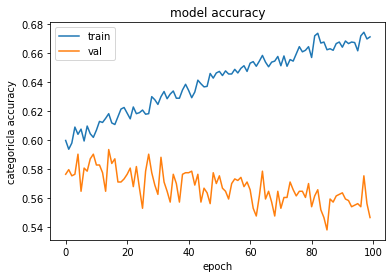

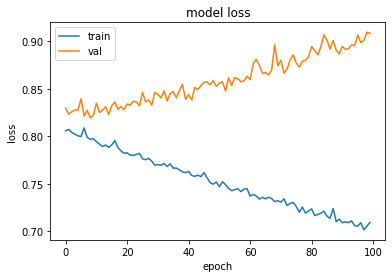

In [ ]:
generate_plots(history)

To get a baseline and compare results before and after, let's evaluate the performance of this model that is over-fitting and not that good and we can compare it with the final model after we tune stuff like learning rate and model parameters (i.e. units, layers)

In [ ]:
# evaluating the above model by combining the training and validation data and re-training for ~100 epochs

#optimizer held constant when testing loss functions
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=100, 
                    batch_size= 32,
                    # validation_data=(X_val,y_val),
                    verbose=0)

print(f'Bad model performance: {model.evaluate(X_test, y_test)}')

14/14 [==============================] - 0s 2ms/step - loss: 0.8804 - categorical_accuracy: 0.5455
Bad model performance: [0.880431056022644, 0.5454545617103577]


.5455

In [ ]:
def model_2():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(56, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(32, activation='relu'))

    #model.add(layers.Dense(16, activation='relu')) # let's get rid of this layer

    model.add(layers.Dense(3,activation='softmax'))

    return model

In [ ]:
model = model_2()
model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 56)                504       
                                                                 
 dense_12 (Dense)            (None, 32)                1824      
                                                                 
 dense_13 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,427
Trainable params: 2,427
Non-trainable params: 0
_________________________________________________________________


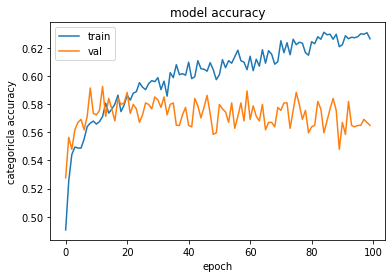

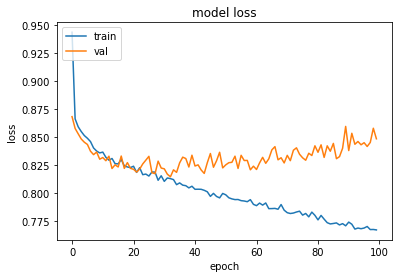

In [ ]:
generate_plots(history)

Bit better, let's tune the model params a bit more

In [ ]:
def model_3():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(30, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(12, activation='relu'))

    # model.add(layers.Dense(10, activation='relu')) 

    model.add(layers.Dense(3,activation='softmax'))

    return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                270       
                                                                 
 dense_22 (Dense)            (None, 12)                372       
                                                                 
 dense_23 (Dense)            (None, 3)                 39        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


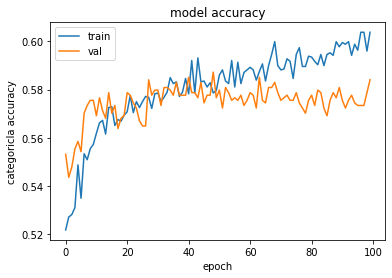

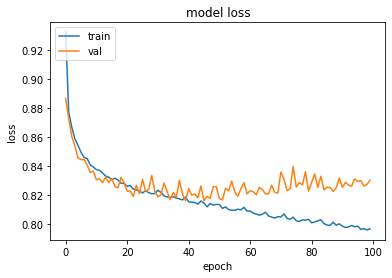

In [ ]:
model = model_3()
model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Better, let's tweak the learning rate and batch size a bit

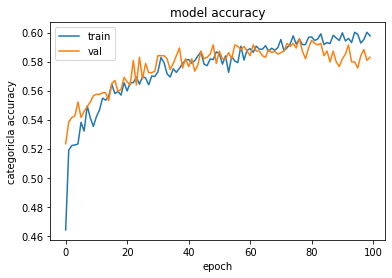

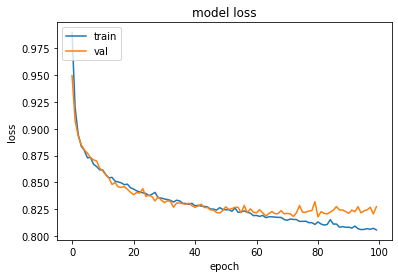

In [ ]:
model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00090) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 64, #increased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Impressive, let's continue by reducing the LR a bit more.

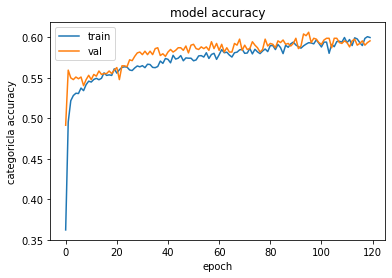

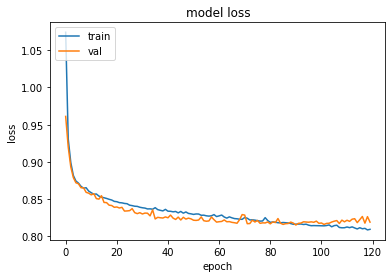

In [ ]:
model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=120, 
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

OK. So we can now combine the training and validation data, train it for ~100 epochs with the parameters above and evaluate it to see the performance of the Categorical Cross Entropy loss + Adam Optimizer on our problem.

In [ ]:
y_val

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=100, 
                    batch_size= 64, #increased batch size
                    # validation_data=(X_val,y_val),
                    verbose=0)

#generate_plots(history)
print(f'Categorical Cross Entropy Loss + Adam Optimizer model performance: {model.evaluate(X_test, y_test)}')

14/14 [==============================] - 0s 2ms/step - loss: 0.8071 - categorical_accuracy: 0.5742
Categorical Cross Entropy Loss + Adam Optimizer model performance: [0.8071064352989197, 0.5741626620292664]


We received a categorical accuracy of .5742, much better than random accuracy of .3333 and the initial categorical accuracy of .5455 that we received in the start without any hyperparameter optimization

Now we can evaluate KL-Divergence Loss

#### 2. KL-Divergence Loss

In [ ]:
# let's start with the default model
model = model_()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 56)                504       
                                                                 
 dense_17 (Dense)            (None, 32)                1824      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 3)                 51        
                                                                 
Total params: 2,907
Trainable params: 2,907
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss="kl_divergence", metrics=["categorical_accuracy"]) #kl_divergence loss

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

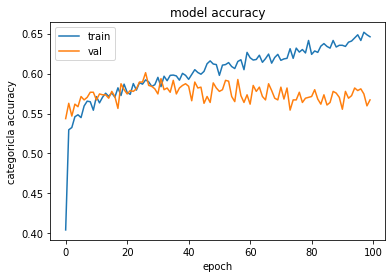

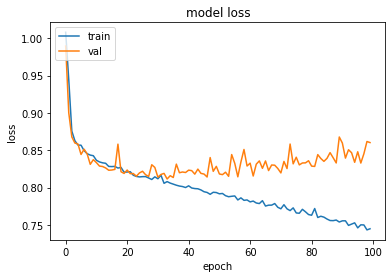

In [ ]:
generate_plots(history)

Overfits somewhat the same as the previous case, let's first evaluate the performance on this over-fitting model to have something to compare to after we tune the parameters

In [ ]:
model = model_() #re-instantiate

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss="kl_divergence", metrics=["categorical_accuracy"]) #kl_divergence loss

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=100, 
                    batch_size= 32,
                    # validation_data=(X_val,y_val),
                    verbose=0)

print(f'KL-Divergence, default model performance: {model.evaluate(X_test, y_test)}')

14/14 [==============================] - 0s 2ms/step - loss: 0.8583 - categorical_accuracy: 0.5287
KL-Divergence, default model performance: [0.858318567276001, 0.5287081599235535]


.5287, note that this is even worst than the default Categorical Cross Entropy loss of .5455 before any hyperparameter optimization. Let's start optimization now.

Let's first use the same parameters that we used previously to test the tuned model

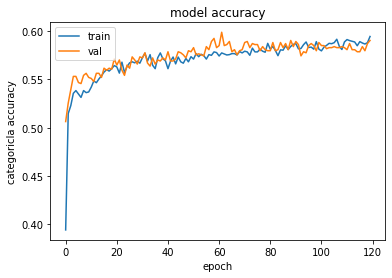

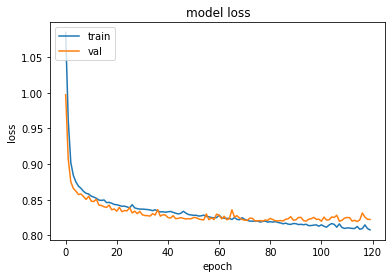

In [ ]:
def model_3():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(30, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(12, activation='relu'))

    # model.add(layers.Dense(10, activation='relu')) 

    model.add(layers.Dense(3,activation='softmax'))

    return model

model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="kl_divergence", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=120, 
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

The same parameters perform pretty well for KL-Divergence as-well, so let's have the cutoff for epochs be at around 60 epochs instead of 120 since it begins to SLIGHTLY overfit and then re-train on the entire training and validation data and evaluate the performance

In [ ]:
model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="kl_divergence", metrics=["categorical_accuracy"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=70, # changed the epochs from 120 to 70 based on loss curves previously seen
                    batch_size= 64, 
                    # validation_data=(X_val,y_val),
                    verbose=0)

print(f'model performance w/ KL Divergence loss {model.evaluate(X_test, y_test)}')

14/14 [==============================] - 0s 3ms/step - loss: 0.8136 - categorical_accuracy: 0.5670
model performance w/ KL Divergence loss [0.8136425614356995, 0.5669856667518616]


So when evaluating the model we receive an categorical accuracy of .5670, comparing this to the start without any tuning we had .5287.

However, with categorical crossentropy we had a tuned model performance of .5742 so we were close but not close enough

#### 3. Categorical Hinge Loss

Starting with the default

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 56)                504       
                                                                 
 dense_36 (Dense)            (None, 32)                1824      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 3)                 51        
                                                                 
Total params: 2,907
Trainable params: 2,907
Non-trainable params: 0
_________________________________________________________________


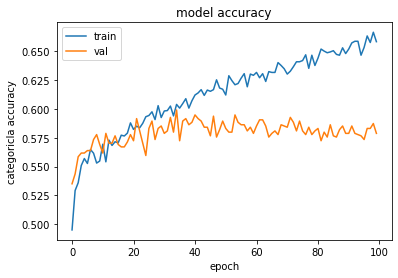

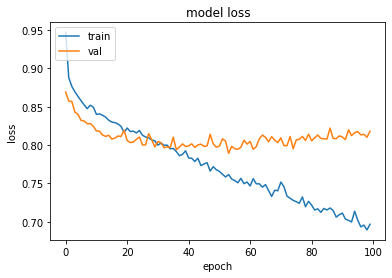

In [ ]:
model = model_() #default model
model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # default

#Compiling the model
model.compile(optimizer=opt, loss="categorical_hinge", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, #default
                    batch_size= 32, #default
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Loss curves look a bit different here, let's evaluate the model

In [ ]:
model = model_() #default model
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # default

#Compiling the model
model.compile(optimizer=opt, loss="categorical_hinge", metrics=["categorical_accuracy"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=100, #default
                    batch_size= 32, #default
                    # validation_data=(X_val,y_val),
                    verbose=0)

# generate_plots(history)

print(f'Categorical Hinge base model performance: {model.evaluate(X_test, y_test)}')

14/14 [==============================] - 0s 2ms/step - loss: 0.8579 - categorical_accuracy: 0.5431
Categorical Hinge base model performance: [0.8579023480415344, 0.5430622100830078]


.5431, it's better baseline performance than KL-Divergence and almost better than categorical cross entropy (which was .5455)

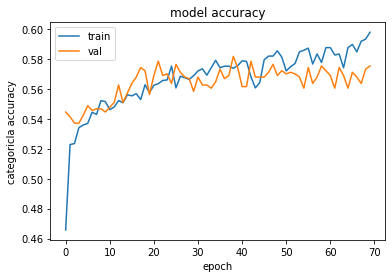

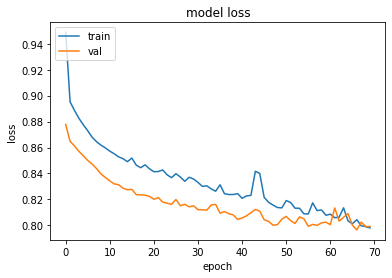

In [ ]:
# let's tune the model a bit

model = model_() #default model
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00085) # Decreased the LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_hinge", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=70, # decreased the epochs a bit
                    batch_size= 64, # increased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Let's lower the LR some more, increase the batch size and decrease the epochs

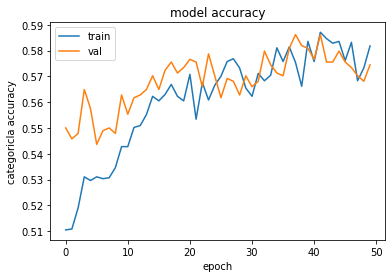

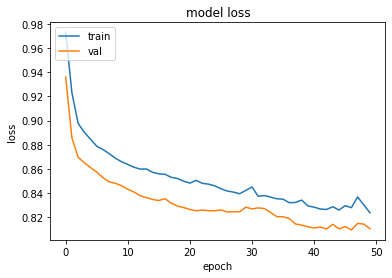

In [ ]:
# let's tune the model a bit

model = model_() #default model
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00075) # Decreased the LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_hinge", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=50, # decreased the epochs a bit
                    batch_size= 128, # increased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

This looks pretty good, let's train for a bit more epochs and see what happens

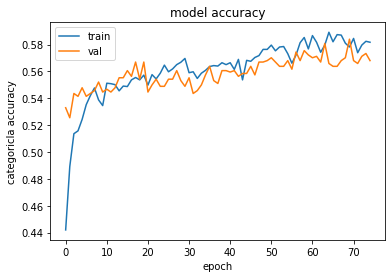

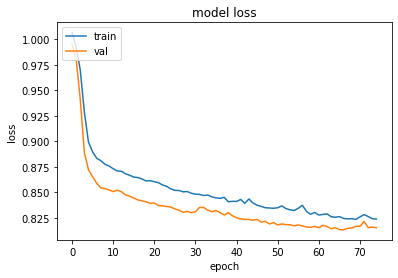

In [ ]:
# let's tune the model a bit

model = model_() #default model
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00075) # Decreased the LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_hinge", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=75, # decreased the epochs a bit
                    batch_size= 128, # increased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

It doesn't look like it's overfitting, let's train for more epochs

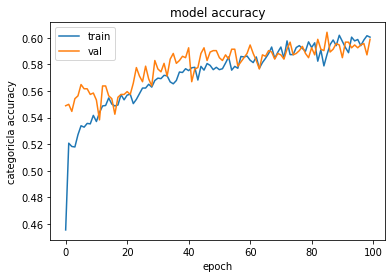

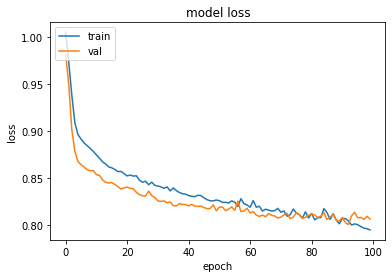

In [ ]:
# let's tune the model a bit

model = model_() #default model
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00075) # Decreased the LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_hinge", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, # increased the epochs a bit
                    batch_size= 128, 
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

OK. Let's do the following:
Combine the training and validation set, train for ~ 90 epochs and then test and evaluate the performance of the categorical hinge loss

In [ ]:
# let's tune the model a bit

model = model_() #default model
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00075) # Decreased the LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_hinge", metrics=["categorical_accuracy"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=90, # increased the epochs a bit
                    batch_size= 128, 
                    # validation_data=(X_val,y_val),
                    verbose=0)

# generate_plots(history)

print(f'Categorical Hinge loss model performance: {model.evaluate(X_test, y_test)}')

14/14 [==============================] - 0s 2ms/step - loss: 0.8507 - categorical_accuracy: 0.5526
Categorical Hinge loss model performance: [0.8506636619567871, 0.5526315569877625]


.5526, it's still less than the categorical cross entropy and it's less than KL-Divergence aswell

Final results:

The categorical crossentropy loss had the best tuned performance (categorical accuracy of .5742) with the model parameters (layers, units) to be from model_3()

Second place was KL-Divergence with the a tuned model performance (categorical accuracy) of .5670

and lastly in third place we had categorical hinge with a tuned model performance of .5526 (although from the loss curves up above, it definitely seems like it could've been higher)

## Analyzing Optimizers

Note that our best model performance for the loss came from CCE.

The LR for that model was .00080, with Adam optimizer.

We had 100 epochs and a batch size of 64.

In [ ]:
model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=100, 
                    batch_size= 64, #increased batch size
                    # validation_data=(X_val,y_val),
                    verbose=0)

#generate_plots(history)
print(f'Categorical Cross Entropy Loss + Adam Optimizer model performance: {model.evaluate(X_test, y_test)}')

We'll evaluate the following optimizers available in Keras
* SGD
* RMSprop
* Adam
* Adadelta
* Adagrad
* Nadam

We'll also measure the time it takes to converge by starting a timer when model.fit() gets called and ending the timer after the model finishes the set number of epochs. We'll compare these results in the report

#### 1. SGD

Elapsed time for training with SGD: 20.788238763809204


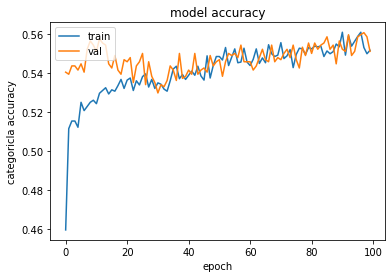

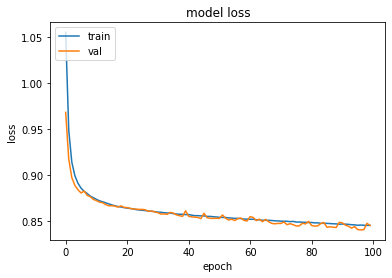

In [ ]:
loss = 'categorical_crossentropy'
metrics=['categorical_accuracy']

model = model_3()

opt = tf.keras.optimizers.SGD(learning_rate=0.01) #default lr for sgd

model.compile(optimizer=opt, loss=loss, metrics=metrics)

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 64, #increased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with SGD: {elapsed_time}')

generate_plots(history)

I think we can train it for around 20 - 30 more epochs because there isn't really any sign of over-fitting yet with SGD, let's also change the learning rate a bit to smoothen the curve for accuracy

Elapsed time for training with SGD: 21.254894495010376 seconds


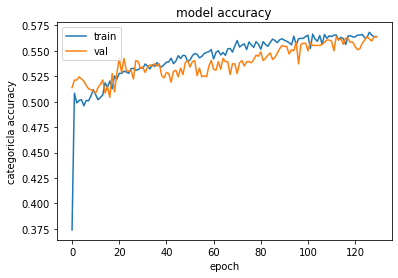

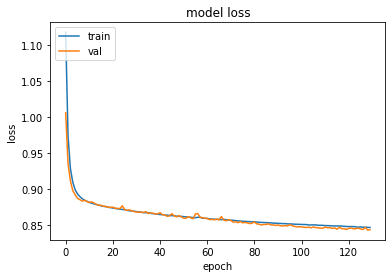

In [ ]:
loss = 'categorical_crossentropy'
metrics=['categorical_accuracy']

def model_3():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(30, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(12, activation='relu'))

    # model.add(layers.Dense(10, activation='relu')) 

    model.add(layers.Dense(3,activation='softmax'))

    return model

model = model_3()

opt = tf.keras.optimizers.SGD(learning_rate=0.009) #decreased lr
model.compile(optimizer=opt, loss=loss, metrics=metrics)

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=130, 
                    batch_size= 64,
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with SGD: {elapsed_time} seconds')

generate_plots(history)

This is better, so let's just re-train the model using the combined training and validation data set and evaluate the performance of SGD

In [ ]:
loss = 'categorical_crossentropy'
metrics=['categorical_accuracy']

model = model_3()

opt = tf.keras.optimizers.SGD(learning_rate=0.009) #changed LR

model.compile(optimizer=opt, loss=loss, metrics=metrics)

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=120, 
                    batch_size= 64,
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with SGD: {elapsed_time} seconds')
print(f'Model performance for SGD: {model.evaluate(X_test, y_test)}')

# generate_plots(history)

Elapsed time for training with SGD: 29.045610189437866 seconds
14/14 [==============================] - 0s 6ms/step - loss: 0.8265 - categorical_accuracy: 0.5646
Model performance for SGD: [0.8264666199684143, 0.5645933151245117]


SGD Results:
~29.04 seconds to converge with cat accuracy of .5646

#### 2. RMSprop

Elapsed time for training with RMSprop: 41.45208787918091 seconds


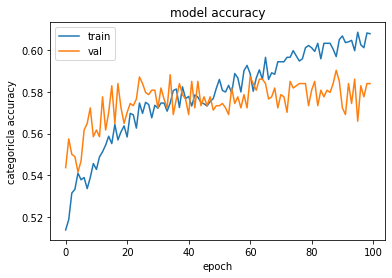

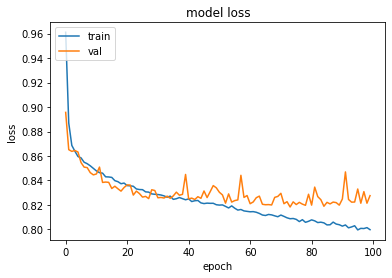

In [ ]:
loss = 'categorical_crossentropy'
metrics=['categorical_accuracy']

def model_3():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(30, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(12, activation='relu'))

    # model.add(layers.Dense(10, activation='relu')) 

    model.add(layers.Dense(3,activation='softmax'))

    return model

model = model_3()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001) # .001 is the default LR for RMSprop
model.compile(optimizer=opt, loss=loss, metrics=metrics)

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=100, #training for 100 epochs to start with
                    batch_size= 32, #32 data points as a batch to start with 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with RMSprop: {elapsed_time} seconds')
generate_plots(history)

Initial notes:
* Takes almost twice as long to run less epochs than SGD,
* model begins to overfit after around 50 epochs
* Lowering the LR might help, aswell as increasing batch size

Elapsed time for training with RMSprop: 20.965665817260742 seconds


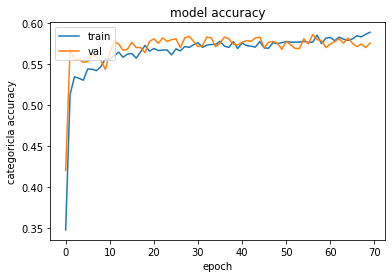

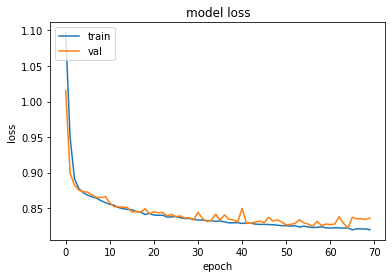

In [ ]:
loss = 'categorical_crossentropy'
metrics=['categorical_accuracy']

def model_3():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(30, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(12, activation='relu'))

    # model.add(layers.Dense(10, activation='relu')) 

    model.add(layers.Dense(3,activation='softmax'))

    return model

model = model_3()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0009) # lowered LR to .0009
model.compile(optimizer=opt, loss=loss, metrics=metrics)

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=70, #reduced epochs from 100 to 70
                    batch_size= 64, #64 data points as a batc
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with RMSprop: {elapsed_time} seconds')
generate_plots(history)

Interesting, now it only took 20 seconds, so we doubled the batch size and it cut the time it takes to train in half

This also seems like a good fit so far, so let's combine the training data with the validation data and re-train the model on that for 70 epochs and evaluate the performance.

In [ ]:
loss = 'categorical_crossentropy'
metrics=['categorical_accuracy']

def model_3():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(30, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(12, activation='relu'))

    # model.add(layers.Dense(10, activation='relu')) 

    model.add(layers.Dense(3,activation='softmax'))

    return model

model = model_3()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0009) # keeping LR the same
model.compile(optimizer=opt, loss=loss, metrics=metrics)

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=70, # keeping epochs the same
                    batch_size= 64, # keeping batch size the same
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with RMSprop: {elapsed_time} seconds')
print(f'Model performance for RMSprop optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)

Elapsed time for training with RMSprop: 10.687618494033813 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.8150 - categorical_accuracy: 0.5574
Model performance for RMSprop optimizer: [0.8149599432945251, 0.5574162602424622]


RMSprop results:
* Took 10.68 seconds, 70 epochs to converge. Resulted in an accuracy of .5574

#### 3. Adam (Already done when analyzing loss)

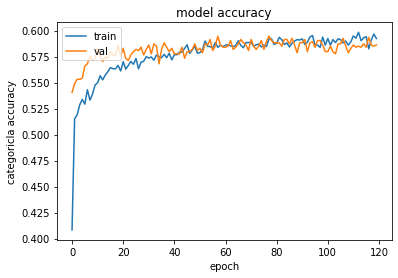

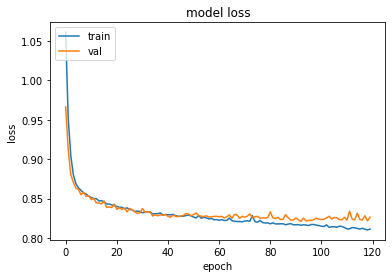

In [ ]:
# This was the optimal model from the above section (Analying Loss)

model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=120, 
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

We can see that the model begins to slightly overfit after ~65 - 70 epochs so we'll set that as the cutoff, combine the training and validation data and re-train on it, and collect the amount of time it takes to train.

In [ ]:
# This was the optimal model from the above section (Analying Loss)

model = model_3()
# model.summary()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=70, 
                    batch_size= 64, 
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)


Elapsed time for training with Adam: 10.642444372177124 seconds
14/14 [==============================] - 0s 2ms/step - loss: 0.8179 - categorical_accuracy: 0.5885
Model performance for Adam optimizer: [0.8178877830505371, 0.5885167717933655]


Very good performance.
Adam took 10.624 seconds to converge in a total of 70 epochs and resulted in a categorical accuracy of .5885

#### 4. Adadelta

Elapsed time for training with Adadelta: 21.121943712234497 seconds


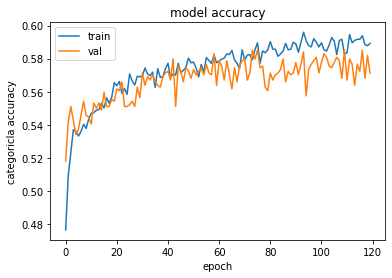

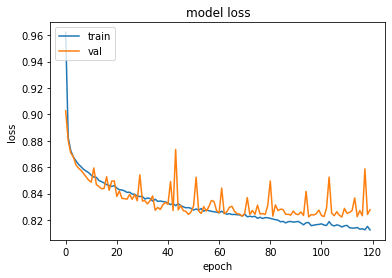

In [ ]:


model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adadelta(learning_rate=1.0) # default LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=120, # starting off with 120 epochs
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adadelta: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Let's lower the learning rate a bit, also it's overfitting after around 60 epochs

Elapsed time for training with Adadelta: 14.383309602737427 seconds


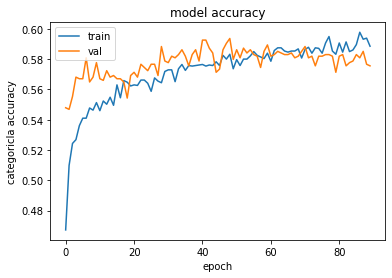

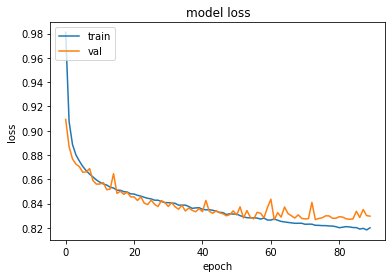

In [ ]:


model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adadelta(learning_rate=.80) # default LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=90, # Lowering epochs
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adadelta: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Let's lower the learning rate some more and lower the batch size

Elapsed time for training with Adadelta: 41.340784549713135 seconds


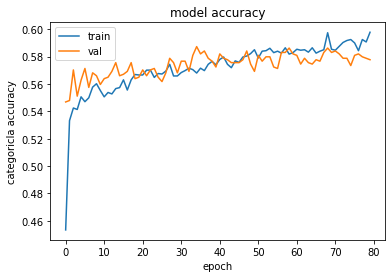

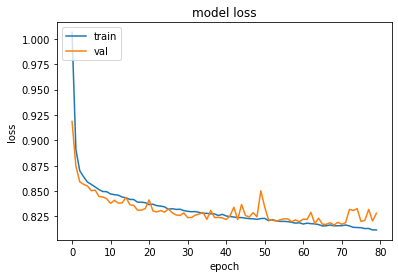

In [ ]:


model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adadelta(learning_rate=0.75) # default LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=80, # Let's up the epochs to 400
                    batch_size= 32, # 32 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adadelta: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


OK. Let's cut it off at 45 epochs, train for batch size with 32, and combine the training data + val data and re-train the model on that

In [ ]:


model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adadelta(learning_rate=0.75) # default LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=45, # Let's up the epochs to 400
                    batch_size= 32, # 32 batches, let's see how long it takes to converge
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adadelta: {elapsed_time} seconds')
print(f'Model performance for Adadelta optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)

Elapsed time for training with Adadelta: 21.108059883117676 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.8153 - categorical_accuracy: 0.5766
Model performance for Adadelta optimizer: [0.8153476119041443, 0.5765550136566162]


Adadelta results:
Took 21.108 seconds, training for a total of 45 epochs to receive a categorical accuracy of .5766

#### 5. Adagrad

Elapsed time for training with Adagrad: 41.838905334472656 seconds


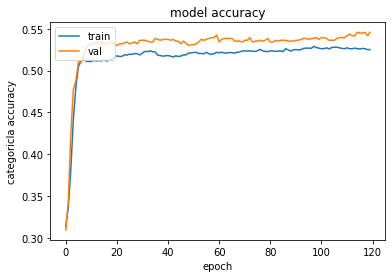

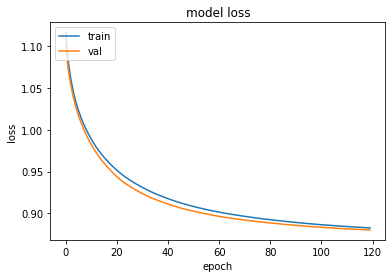

In [ ]:
model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adagrad(learning_rate=0.001) # default LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=120, # starting off with 120 epochs
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adagrad: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Interesting loss curve, we can probably train it for like 100 epochs and be fine. I'm also going to increase the learning rate

Elapsed time for training with Adagrad: 21.2818284034729 seconds


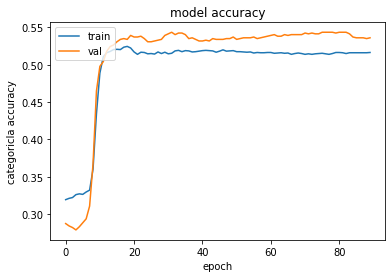

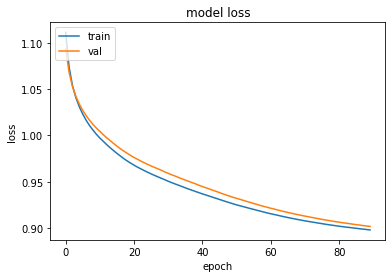

In [ ]:

model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adagrad(learning_rate=0.0015) # increasing LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=90, # lowering the epochs
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adagrad: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Let's just test and see like 200 epochs to see if the model improves a lot more or not

Elapsed time for training with Adagrad: 31.90494465827942 seconds


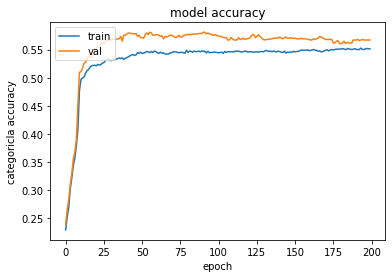

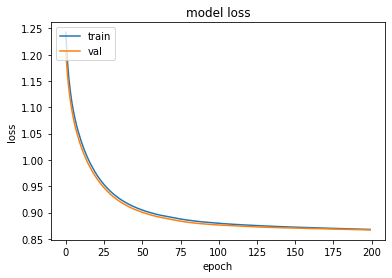

In [ ]:

model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adagrad(learning_rate=0.0015) # increasing LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=200, # lowering the epochs
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adagrad: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Visually we can see that the model accuracy peaks around 30 - 40 epochs. The loss continues to decrease ever so slightly, but we could probably just train it for like 35 epochs and be fine.

Let's combine the training + val data and re-train

In [ ]:

model = model_3()
# model.summary()


opt = tf.keras.optimizers.Adagrad(learning_rate=0.0015) # increasing LR

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=35, # lowering the epochs
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adagrad: {elapsed_time} seconds')
print(f'Model performance for Adagrad optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)


Elapsed time for training with Adagrad: 4.707675218582153 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.9515 - categorical_accuracy: 0.5622
Model performance for Adagrad optimizer: [0.9515323638916016, 0.5622009634971619]


Adagrad converged very fast, in 4.7 seconds with 35 epochs total and obtained a categorical accuracy of .5622

#### 6. Nadam

Elapsed time for training with Nadam: 21.79936933517456 seconds


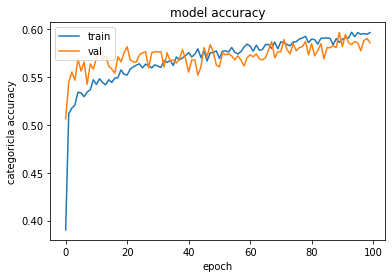

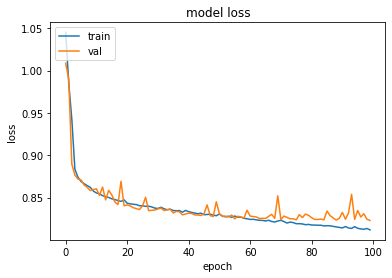

In [ ]:

model = model_3()
# model.summary()


opt = tf.keras.optimizers.Nadam(learning_rate=0.001) # default

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=100, # default
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Nadam: {elapsed_time} seconds')
# print(f'Model performance for Nadam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Let's lower the LR and change epochs to around 50.

Elapsed time for training with Nadam: 10.652241230010986 seconds


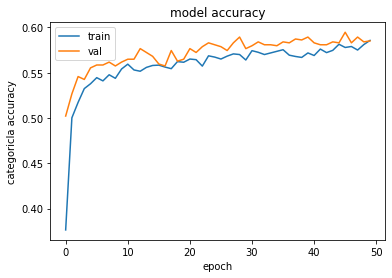

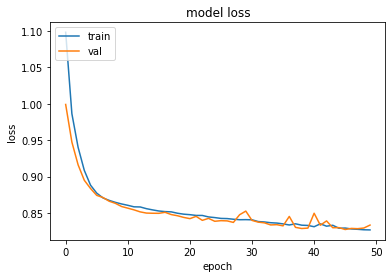

In [ ]:

model = model_3()
# model.summary()


opt = tf.keras.optimizers.Nadam(learning_rate=0.00085) # default

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=50, # default
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Nadam: {elapsed_time} seconds')
# print(f'Model performance for Nadam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Good curves, let's re-train the model now using all the training and val data

In [ ]:

model = model_3()
# model.summary()


opt = tf.keras.optimizers.Nadam(learning_rate=0.00085) # default

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=50, # default
                    batch_size= 64, # 64 batches, let's see how long it takes to converge
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Nadam: {elapsed_time} seconds')
print(f'Model performance for Nadam optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)


Elapsed time for training with Nadam: 9.52812933921814 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.8227 - categorical_accuracy: 0.5622
Model performance for Nadam optimizer: [0.8226732611656189, 0.5622009634971619]


Results for Nadam:
Converged in a 9.53 seconds in 50 epochs and obtained a categorical accuracy of .5622

Please see report for final results for all different optimizers.

Conclusion:
1. Adam Optimizer - 10.64 Seconds to converge, 45 epochs, .5885 categorical accuracy

2. Adadelta - 21.11 seconds, 45 epochs, .5766 acc

3. SGD - 29.04 seconds, 120 epochs, .5646 acc

4. Adagrad - 4.7 seconds!, 35 epochs, .5622 acc

5. Nadam - 9.53 seconds, 50 epochs, .5622 (tie with #4)

6. RMSprop - 10.68 seconds, 70 epochs, .5574 acc

## Evaluating effects of different regularization measures

We'll be using the Adam Optimizer w/ Categorical Cross Entropy Loss (as determined from previous sections) and `model_3_edited()` below

In [ ]:
# plotting function:
def generate_plots(history):
    #accuracies
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categoricla accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
def model_3_edited():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(40, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.Dense(15, activation='relu'))

    model.add(layers.Dense(10, activation='relu')) 

    model.add(layers.Dense(3,activation='softmax'))

    return model

First let's just evaluate the performance without any regularization, then add in weight decay, dropout, batch norm, and ensemble classifier.

Also maybe try and change up the model a bit like make it have more units?

In [ ]:
model = model_3_edited()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                360       
                                                                 
 dense_1 (Dense)             (None, 15)                615       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,168
Trainable params: 1,168
Non-trainable params: 0
_________________________________________________________________


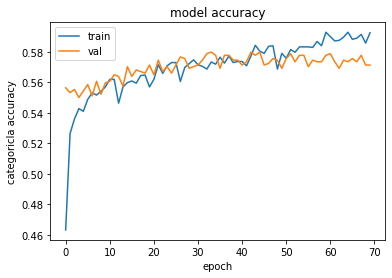

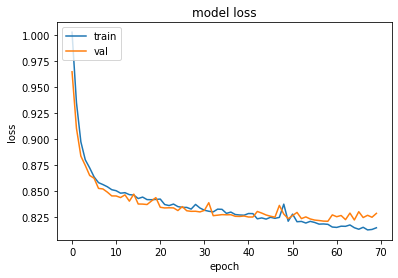

In [ ]:
# We'll be using CCE loss + Adam optimizer w/ tuned LR
# This was the optimal model from the above section (Analying Loss)
model = model_3_edited()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=70, 
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

# print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)


Okay so we can see that after to 50 epoch range the model begins to overfit slightly. So first let's evaluate the performance of this model by training it on the entire training + validation data to have something to compare it to after we apply some regularization techniques

In [ ]:
# We'll be using CCE loss + Adam optimizer w/ tuned LR
# This was the optimal model from the above section (Analying Loss)
model = model_3_edited()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00080) # decreased learning rate

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=50, 
                    batch_size= 64, 
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)


Elapsed time for training with Adam: 10.673173904418945 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.8220 - categorical_accuracy: 0.5646
Model performance for Adam optimizer: [0.8219693303108215, 0.5645933151245117]


Loss of .8220, Categorical Acc. of .5646

In [ ]:
# Now we can start the regularization process

#### L2-Regularization

In [ ]:
def model_3_edited2():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(units=40, activation='relu', input_shape=(np.shape(X_train)[1],), kernel_regularizer=tf.keras.regularizers.L2(0.01))) # Adding L2 regularization, rate=0.01

    model.add(layers.Dense(units=15, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.01))) #.01 rate
    
    #Let's also add Dropout Layer
    # model.add(layers.Dropout(rate=0.35)) #35% rate

    # model.add(layers.Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))) #.01 rate

    #And finally let's add Batch Normalization layer
    # model.add(layers.BatchNormalization())

    #Let's also add Dropout Layer
    # model.add(layers.Dropout(rate=0.15)) #15% rate

    model.add(layers.Dense(units=3,activation='softmax'))

    return model

In [ ]:
model = model_3_edited2()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                360       
                                                                 
 dense_1 (Dense)             (None, 15)                615       
                                                                 
 dense_2 (Dense)             (None, 3)                 48        
                                                                 
Total params: 1,023
Trainable params: 1,023
Non-trainable params: 0
_________________________________________________________________


Let's compile the model and train it and evaluate it by the loss curves

Elapsed time for training with Adam: 21.334168195724487 seconds


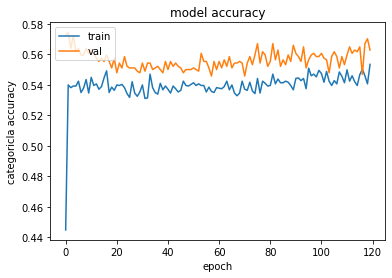

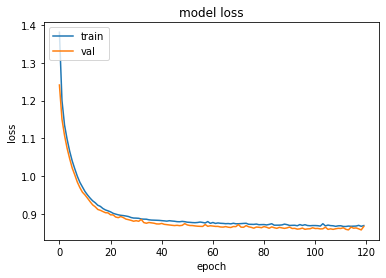

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=120, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)

Re-training this on the entire dataset

In [ ]:
model = model_3_edited2()
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=120, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)

Elapsed time for training with Adam: 41.61263465881348 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.8506 - categorical_accuracy: 0.5718
Model performance for Adam optimizer: [0.8506100177764893, 0.5717703104019165]


Nice, we had an increase in categorical accuracy from .5646 to .5718 from adding weight decay, dropout layers, and batch_normalization

#### DropOut

In [ ]:
def model_3_edited3():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(units=40, activation='relu', input_shape=(np.shape(X_train)[1],)))
    model.add(layers.Dense(units=15, activation='relu')) 
    
    #Let's also add Dropout Layer
    model.add(layers.Dropout(rate=0.35)) #35% rate

    # model.add(layers.Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))) #.01 rate

    #And finally let's add Batch Normalization layer
    # model.add(layers.BatchNormalization())

    #Let's also add Dropout Layer
    # model.add(layers.Dropout(rate=0.15)) #15% rate

    model.add(layers.Dense(units=3,activation='softmax'))

    return model

In [ ]:
model = model_3_edited3()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                360       
                                                                 
 dense_13 (Dense)            (None, 15)                615       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 48        
                                                                 
Total params: 1,023
Trainable params: 1,023
Non-trainable params: 0
_________________________________________________________________


Elapsed time for training with Adam: 41.912599325180054 seconds


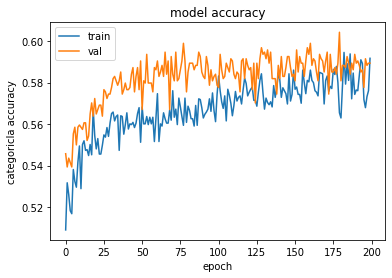

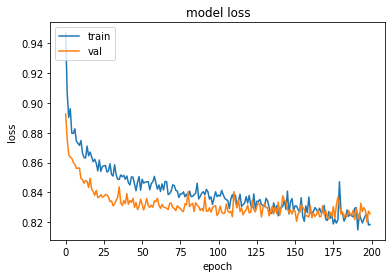

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=200, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)

This is good, let's combine the data and train it for 200 epochs

In [ ]:
# Let's try tuning the dropout rate:
def model_3_edited3_dropoutratetuned():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(units=40, activation='relu', input_shape=(np.shape(X_train)[1],)))
    model.add(layers.Dense(units=15, activation='relu')) 
    
    #Let's also add Dropout Layer
    model.add(layers.Dropout(rate=0.25)) # 25% rate

    # model.add(layers.Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))) #.01 rate

    #And finally let's add Batch Normalization layer
    # model.add(layers.BatchNormalization())

    #Let's also add Dropout Layer
    # model.add(layers.Dropout(rate=0.15)) #15% rate

    model.add(layers.Dense(units=3,activation='softmax'))

    return model


model = model_3_edited3_dropoutratetuned()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 40)                360       
                                                                 
 dense_19 (Dense)            (None, 15)                615       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_20 (Dense)            (None, 3)                 48        
                                                                 
Total params: 1,023
Trainable params: 1,023
Non-trainable params: 0
_________________________________________________________________


Elapsed time for training with Adam: 31.146069049835205 seconds


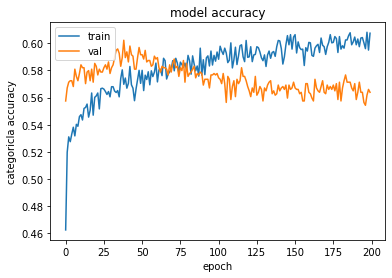

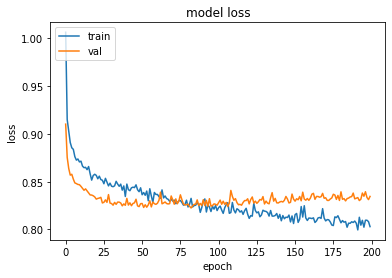

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=200, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)

Maybe we can train it for around only 50 epochs and see how it performs

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=50, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)

Elapsed time for training with Adam: 9.746570110321045 seconds
14/14 [==============================] - 0s 2ms/step - loss: 0.8151 - categorical_accuracy: 0.5670
Model performance for Adam optimizer: [0.8151245713233948, 0.5669856667518616]


Slight improvement from .5646 to .5670 just by adding dropout with rate = 0.15

#### BatchNorm

In [ ]:
def model_3_edited4():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(units=40, activation='relu', input_shape=(np.shape(X_train)[1],)))

    model.add(layers.BatchNormalization())

    model.add(layers.Dense(units=15, activation='relu')) 
    
    #Let's also add Dropout Layer
    # model.add(layers.Dropout(rate=0.35)) #35% rate

    # model.add(layers.Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))) #.01 rate

    #And finally let's add Batch Normalization layer
    model.add(layers.BatchNormalization())

    #Let's also add Dropout Layer
    # model.add(layers.Dropout(rate=0.15)) #15% rate

    model.add(layers.Dense(units=3,activation='softmax'))

    return model

In [ ]:
model = model_3_edited4()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 40)                360       
                                                                 
 batch_normalization (BatchN  (None, 40)               160       
 ormalization)                                                   
                                                                 
 dense_22 (Dense)            (None, 15)                615       
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 3)                 48        
                                                                 
Total params: 1,243
Trainable params: 1,133
Non-traina

Elapsed time for training with Adam: 142.627201795578 seconds


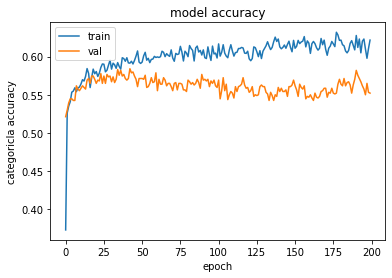

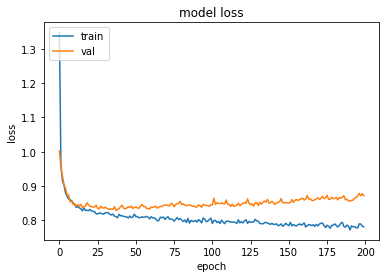

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=200, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)

Took a lot longer and didn't even need that many epochs, let's just do it for like 40 epochs

Elapsed time for training with Adam: 11.276753902435303 seconds


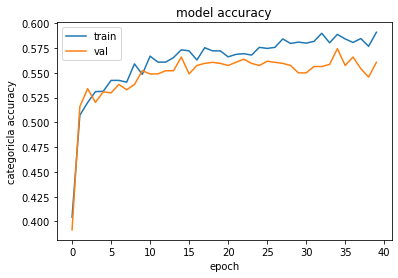

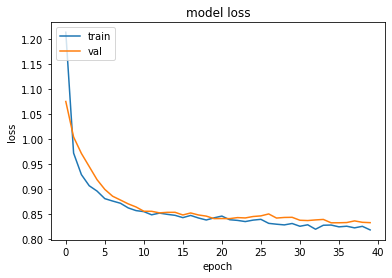

In [ ]:
model = model_3_edited4()

opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=40, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)

Looks good, let's combine the datasets and re-train for 45 epochs

In [ ]:
model = model_3_edited4()

opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=45, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)

Elapsed time for training with Adam: 21.168511390686035 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.8322 - categorical_accuracy: 0.5502
Model performance for Adam optimizer: [0.8321783542633057, 0.5502392053604126]


Surprisingly the categorical accuracy isn't that good. It actually got worst

#### All Combined

In [ ]:
# for this one, I want to see the impact of combining different forms of regularization all together such as 
# weight decay, dropout, and batch norm


def model_3_edited_combined():
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(units=40, activation='relu', input_shape=(np.shape(X_train)[1],), kernel_regularizer=tf.keras.regularizers.L2(0.01)))

    model.add(layers.BatchNormalization())

    model.add(layers.Dense(units=15, activation='relu')) 
    
    #Let's also add Dropout Layer
    model.add(layers.Dropout(rate=0.25)) #25% rate

    model.add(layers.Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))) #.01 rate

    #And finally let's add Batch Normalization layer
    model.add(layers.BatchNormalization())

    #Let's also add Dropout Layer
    model.add(layers.Dropout(rate=0.15)) #15% rate

    model.add(layers.Dense(units=3,activation='softmax'))

    return model

In [ ]:
model = model_3_edited_combined()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 40)                360       
                                                                 
 batch_normalization_8 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dense_34 (Dense)            (None, 15)                615       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                160       
                                                                 
 batch_normalization_9 (Batc  (None, 10)               40        
 hNormalization)                                     

Elapsed time for training with Adam: 42.320980072021484 seconds


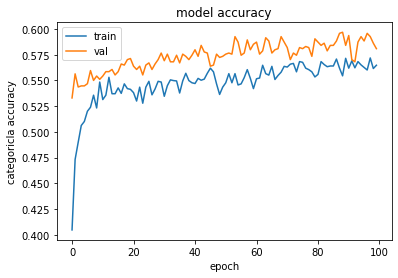

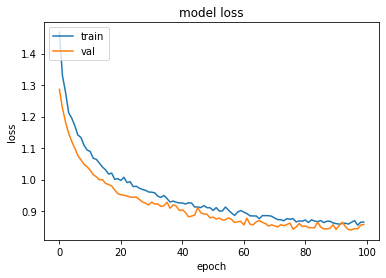

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(X_train,
                    y_train,
                    epochs=100, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
# print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
generate_plots(history)

Seems good to me let's retrain

In [ ]:
model = model_3_edited_combined()
opt = tf.keras.optimizers.Adam(learning_rate=0.00080)

#Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=120, #increased the epochs after adding regularization
                    batch_size= 64, 
                    validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with Adam: {elapsed_time} seconds')
print(f'Model performance for Adam optimizer: {model.evaluate(X_test, y_test)}')
# generate_plots(history)

Elapsed time for training with Adam: 41.61263465881348 seconds
14/14 [==============================] - 0s 3ms/step - loss: 0.8506 - categorical_accuracy: 0.5718
Model performance for Adam optimizer: [0.8506100177764893, 0.5717703104019165]
